### Weight Initialization Techniques

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

2024-02-28 07:09:59.273539: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-28 07:10:01.913855: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 07:10:01.913982: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 07:10:02.387448: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-28 07:10:03.356459: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-28 07:10:03.360663: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
mnist = tf.keras.datasets.mnist

mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/home/codespace/.python/current/lib/python3.10/site-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 
x_val , x_train = x_train[:5000], x_train[5000:]
y_val , y_train = y_train[:5000], y_train[5000:]


<Axes: >

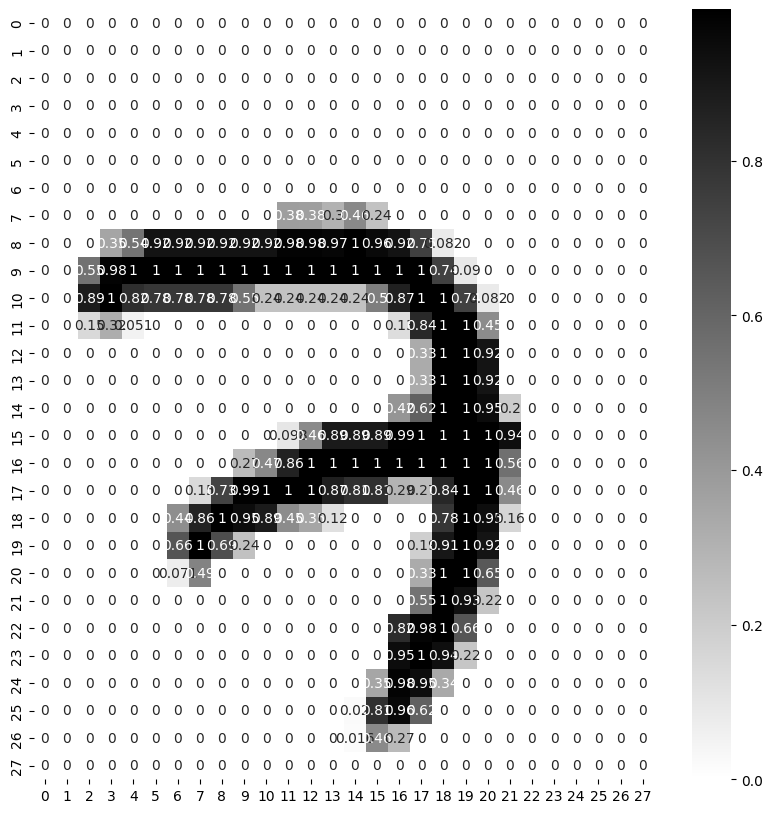

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(x_train[0], annot=True, cmap='binary')

In [8]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

## Defining the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28), name= "input_layer"))
model.add(Dense(64, activation='relu', name= "hidden_layer_1" , kernel_initializer = tf.keras.initializers.HeNormal(seed=None)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', name= "hidden_layer_1_a" , kernel_initializer = tf.keras.initializers.HeNormal(seed=None)))
model.add(Dropout(0.1))
model.add(Dense(16 , activation='relu' , name = "hidden_layer_2" , kernel_initializer = tf.keras.initializers.HeNormal(seed=None)))
model.add(Dropout(0.2))
model.add(Dense(units=10 , activation='softmax' , name = "output_layer"))


In [9]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 64)                50240     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 hidden_layer_1_a (Dense)    (None, 32)                2080      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 hidden_layer_2 (Dense)      (None, 16)                528       
                                                                 
 dropout_7 (Dropout)         (None, 16)               

In [10]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
metrics = ['accuracy']

model.compile(optimizer=optimizer,
                loss=loss_fn,
                metrics=metrics)

In [11]:
epochs = 10
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val))


2024-02-28 07:24:29.661248: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/10


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1699/1719 [============================>.] - ETA: 0s - loss: 2.2048 - accuracy: 0.1653

2024-02-28 07:24:33.963945: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 15680000 exceeds 10% of free system memory.


1719/1719 [==============================] - 4s 2ms/step - loss: 2.2033 - accuracy: 0.1662 - val_loss: 1.9782 - val_accuracy: 0.3936
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.8546 - accuracy: 0.3521 - val_loss: 1.4500 - val_accuracy: 0.6894
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.5203 - accuracy: 0.4912 - val_loss: 1.0968 - val_accuracy: 0.7710
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.3016 - accuracy: 0.5679 - val_loss: 0.8696 - val_accuracy: 0.8014
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.1335 - accuracy: 0.6261 - val_loss: 0.7120 - val_accuracy: 0.8286
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.0132 - accuracy: 0.6654 - val_loss: 0.6139 - val_accuracy: 0.8518
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.9253 - accuracy: 0.6997 - val_loss: 0.5448 - val_accuracy: 0.8676
Epo

<Axes: >

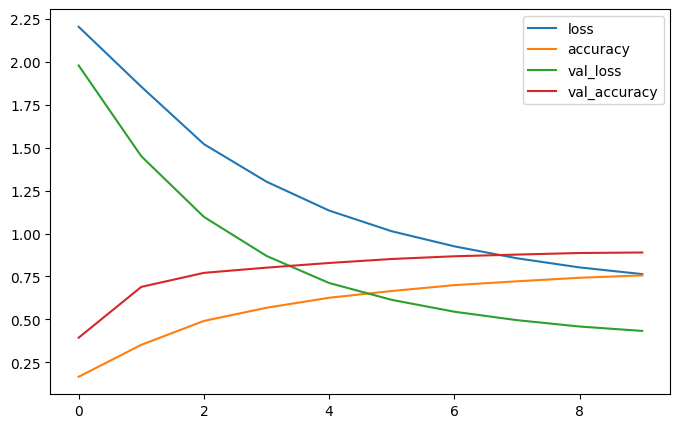

In [14]:
pd.DataFrame(history.history).plot(figsize=(8,5))